In [2]:
import braingeneers.utils.smart_open_braingeneers as smart_open
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fs = 20000   # MaxWell sampling rate

## Read electrode configuration and plot raw raster 

### 1. Assign a dataset path

In [3]:
dataset_path = "s3://braingeneers/ephys/2022-10-20-e-/original/data/" \
           "hc9.19_chp-16849_plated-10.19.22_rec10.19.22.raw.h5"
fig_name = "hc9.19_chp-16849_plated-10.19.22_rec10.19.22.raw.h5"

### 2. Read out channel map and raw raster

In [4]:
with smart_open.open(dataset_path, 'rb') as f:
    with h5py.File(f, 'r') as dataset:
        version = dataset['version'][0]
        data_time = dataset['time'][0].decode('utf-8')
        config_df = pd.DataFrame({'pos_x': np.array(dataset['mapping']['x']), 
                                  'pos_y': np.array(dataset['mapping']['y']),
                                  'channel': np.array(dataset['mapping']['channel'])})
        raw_frame = np.array(dataset['proc0']['spikeTimes']['frameno'])
        rec_startframe = dataset['sig'][-1, 0] << 16 | dataset['sig'][-2, 0]
        proc0_df = pd.DataFrame({'channel': np.array(dataset['proc0']['spikeTimes']['channel']),
                                 'frameno': (raw_frame - rec_startframe) / fs,
                                 'amplitude': np.array(dataset['proc0']['spikeTimes']['amplitude'])})

In [5]:
mins, secs = divmod(proc0_df['frameno'].iloc[-1], 60)
print(dataset_path, "\n")
print("MaxWell dataset version: ", version, "\n")
print(data_time)
print("Recording length: %s minutes %s seconds" % (int(mins), round(secs, 2)))
print("Number of recoding sites: ", len(config_df['channel']))
print("Channel id from", min(config_df['channel']), "to", max(config_df['channel']))

s3://braingeneers/ephys/2022-10-20-e-/original/data/hc9.19_chp-16849_plated-10.19.22_rec10.19.22.raw.h5 

MaxWell dataset version:  b'20160704' 

start: 2022-10-19 22:59:55;
stop: 2022-10-19 23:21:05

Recording length: 21 minutes 9.82 seconds
Number of recoding sites:  984
Channel id from 0 to 1023


### 3. Plot electrode configuration

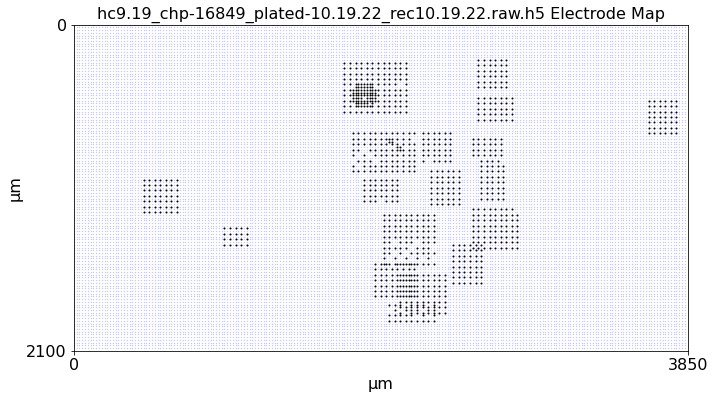

In [6]:
fig, axs = plt.subplots(figsize=(11, 6))
plt.title(fig_name + " Electrode Map", fontsize=16)
elec_xy = np.asarray([(x, y) for x in np.arange(0, 3850, 17.5) for y in np.arange(0, 2100, 17.5)])
axs.scatter(elec_xy[:, 0], elec_xy[:, 1], s=0.1, color='b', alpha=0.3)
axs.scatter(config_df['pos_x'], config_df['pos_y'], s=1, color='k')
axs.set_xlim(0, 3850)
axs.set_ylim(0, 2100)
axs.set_xticks([0, 3850])
axs.set_yticks([0, 2100])
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)
axs.set_xlabel(u"\u03bcm", fontsize=16)
axs.set_ylabel(u"\u03bcm", fontsize=16)
axs.invert_yaxis()
plt.savefig(fig_name + "_Electrode_Map.jpeg", dpi=300)
plt.show()

### 4. Plot MaxWell raster

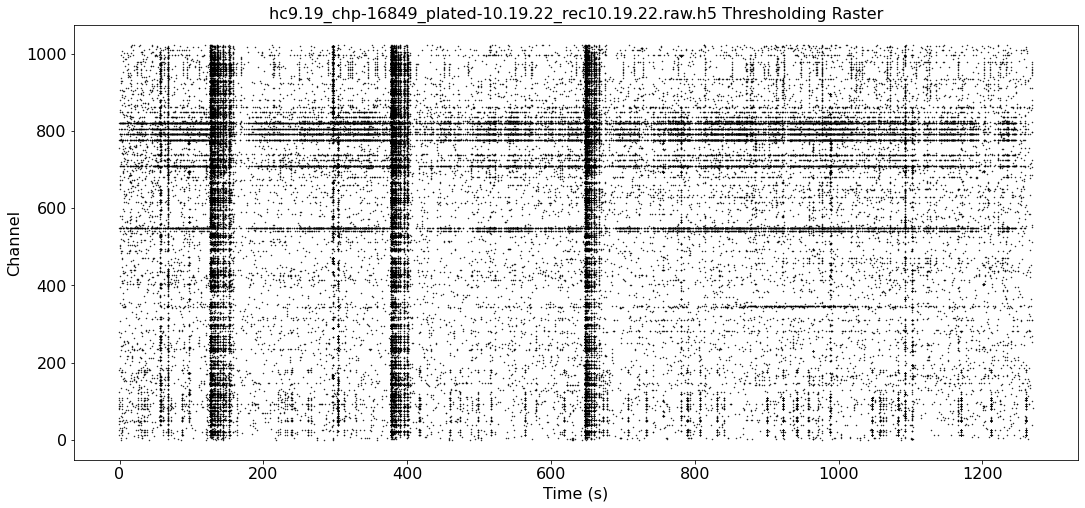

In [7]:
fig, axs = plt.subplots(figsize=(18, 8))
plt.title(fig_name + " Thresholding Raster", fontsize=16)
axs.scatter(proc0_df['frameno'], proc0_df['channel'], s=0.2, color='k')
axs.set_xlabel("Time (s)", fontsize=16)
axs.set_ylabel("Channel", fontsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)
plt.savefig(fig_name + "_Thresholding_Raster.jpeg", dpi=300)
plt.show()

### 5. Plot amplitude

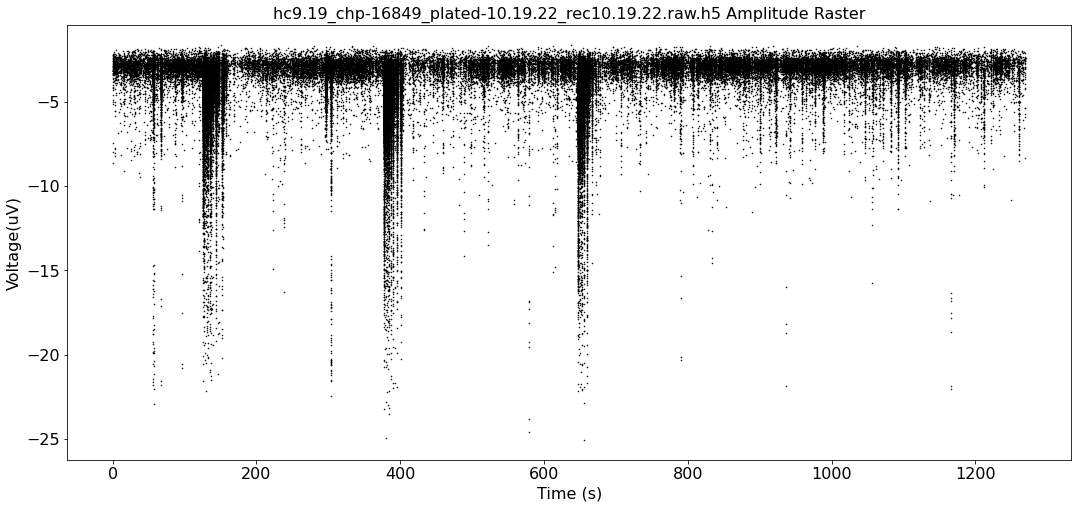

In [8]:
fig, axs = plt.subplots(figsize=(18, 8))
plt.title(fig_name + " Amplitude Raster", fontsize=16)
axs.scatter(proc0_df['frameno'], proc0_df['amplitude'], s=0.3, color='k')
axs.set_xlabel("Time (s)", fontsize=16)
axs.set_ylabel("Voltage(uV)", fontsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)
plt.savefig(fig_name + "_Amplitude_Raster.jpeg", dpi=300)
plt.show()

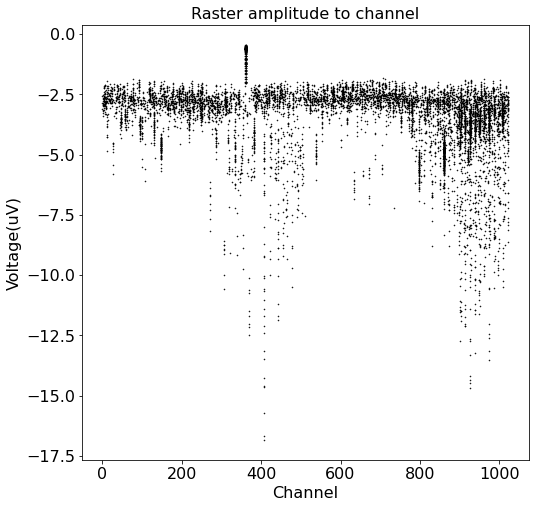

In [8]:
fig, axs = plt.subplots(figsize=(8, 8))
plt.title("Raster amplitude to channel", fontsize=16)
axs.scatter(proc0_df['channel'], proc0_df['amplitude'], s=0.3, color='k')
axs.set_xlabel("Channel", fontsize=16)
axs.set_ylabel("Voltage(uV)", fontsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)
plt.show()

### Testing area

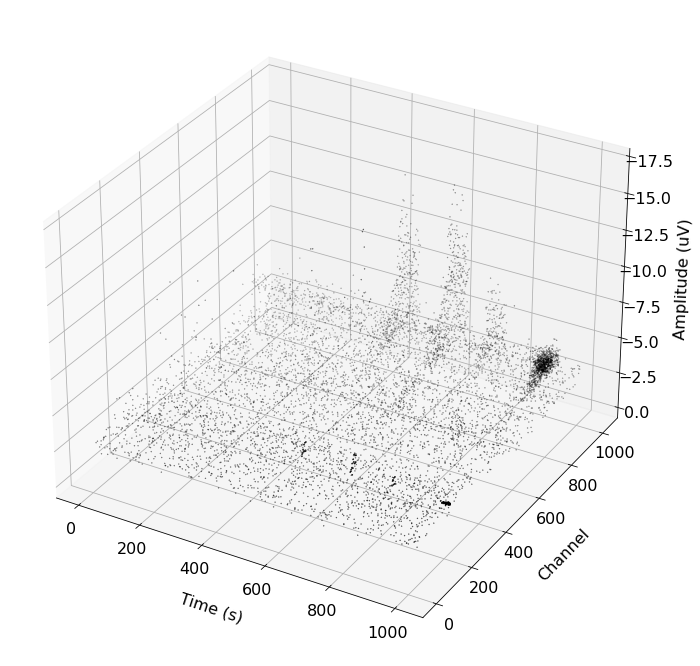

In [9]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
 
fig = plt.figure(figsize=(12, 12))
 
# syntax for 3-D projection
axs = plt.axes(projection ='3d')
 
x = proc0_df['frameno']
y = proc0_df['channel']
z = proc0_df['amplitude']
axs.scatter(x, y, z, s=0.1, color='k')
axs.set_xlabel("Time (s)", labelpad=16, fontsize=16)
axs.set_ylabel("Channel", labelpad=16, fontsize=16)
axs.set_zlabel("Amplitude (uV)", labelpad=16, fontsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)
axs.zaxis.set_tick_params(labelsize=16)
axs.invert_zaxis()
 

plt.show()

In [10]:
# proc0_df_ht = proc0_df.pivot('channel', 'frameno', 'amplitude')
# figure, axs = plt.subplots(figsize=(20, 8))
# axs = sns.heatmap(proc0_df_ht, cmap='rainbow')
# axs.set_facecolor('k')
# axs.invert_yaxis()